In [126]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./hardware_monitor_data.csv')

# Dropping CPU temperature and CPU power columns because 90 percent of data is missing in both of the columns and Simple imputer would not provide best results for the following.

In [127]:
# Drop unnecessary columns
# df = df.drop(['cpu_temperature','cpu_power'], axis='columns')

In [128]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(df['cpu_usage'].values, test_size=0.2, random_state=42)
train_data = train_data.reshape(-1, 1)
val_data = val_data.reshape(-1, 1)

In [129]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(train_data)
    
    # Calculate distortion as the average squared distance from points to their cluster centers
    distortions.append(sum(np.min(cdist(train_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / train_data.shape[0])
    
    # Inertia is calculated directly by KMeans
    inertias.append(kmeanModel.inertia_)
    
    # Store the mappings for easy access
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

Distortion values:
1 : 767.9208224886802
2 : 12.375246332120149
3 : 5.722094923122221
4 : 3.669616608320579
5 : 2.590341455142267
6 : 1.9876933007041055
7 : 1.6276008905638697
8 : 1.4424687649703045
9 : 0.835927327307665


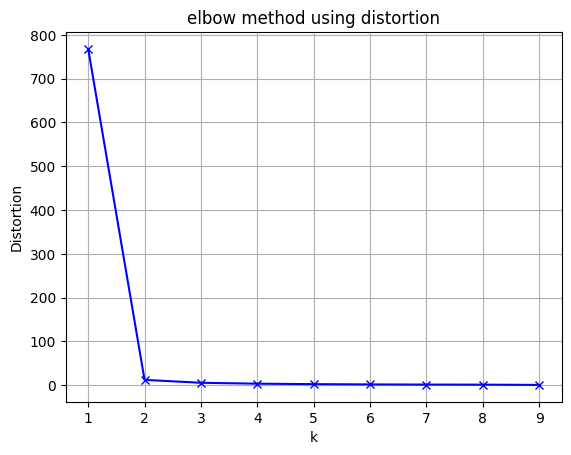

In [130]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('elbow method using distortion')
plt.grid()
plt.show()

In [131]:
# KNN Model
k = 2
knn_cpu_usage = NearestNeighbors(n_neighbors=k)
knn_cpu_usage.fit(train_data)

NearestNeighbors(n_neighbors=2)

(1000,)


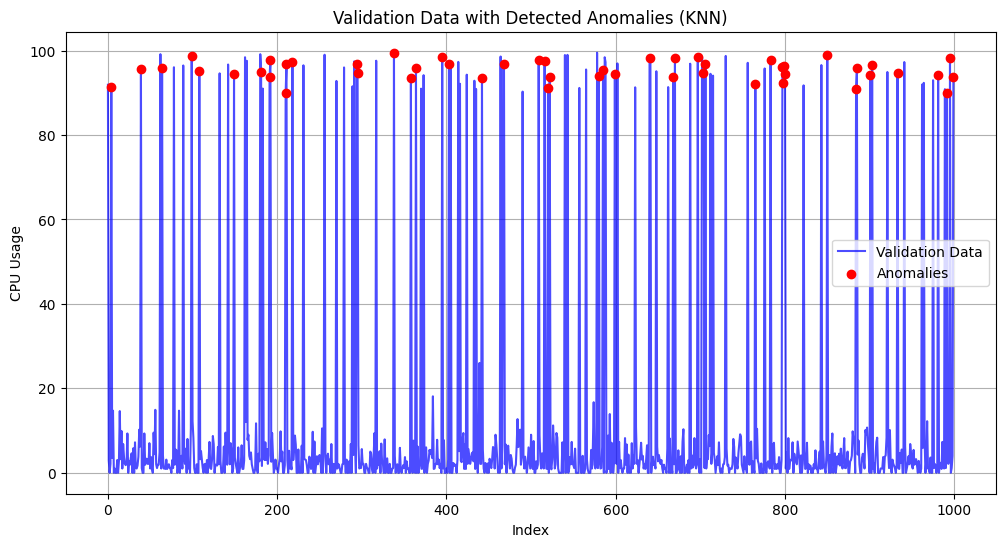

Threshold: 0.0018335047732115576
Number of anomalies detected: 50


In [132]:
# Predict on the validation data
distances, indices = knn_cpu_usage.kneighbors(val_data[1000:2000])

# Use the maximum distance to the k-th neighbor as the anomaly score
anomaly_scores = distances[:, -1]

# Set a threshold for anomalies (e.g., 95th percentile)
threshold = np.percentile(anomaly_scores, 95)

# Detect anomalies (points with scores above the threshold)
anomalies = anomaly_scores > threshold
print(anomalies.shape)
val_indices = np.arange(len(val_data[1000:2000]))

# Plot validation data with anomalies highlighted
plt.figure(figsize=(12, 6))

# Plot the full validation data as a line
plt.plot(val_indices, val_data[1000:2000], label='Validation Data', color='blue', alpha=0.7)

# Highlight anomalies as red scatter points
plt.scatter(val_indices[anomalies], val_data[1000:2000][anomalies], color='red', label='Anomalies', zorder=3)

# Add title, labels, and grid
plt.title('Validation Data with Detected Anomalies (KNN)')
plt.xlabel('Index')
plt.ylabel('CPU Usage')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print additional information
print(f"Threshold: {threshold}")
print(f"Number of anomalies detected: {np.sum(anomalies)}")

# KNN for anomoly detection in memory usage

In [133]:
train_data, val_data = train_test_split(df['memory_usage'].values, test_size=0.2, random_state=42)
train_data = train_data.reshape(-1, 1)
val_data = val_data.reshape(-1, 1)

In [134]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(train_data)
    
    # Calculate distortion as the average squared distance from points to their cluster centers
    distortions.append(sum(np.min(cdist(train_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / train_data.shape[0])
    
    # Inertia is calculated directly by KMeans
    inertias.append(kmeanModel.inertia_)
    
    # Store the mappings for easy access
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

Distortion values:
1 : 191.65354336741817
2 : 7.547315237430931
3 : 4.696298801062672
4 : 1.5587937242329182
5 : 0.8710525429342981
6 : 0.6556720123497882
7 : 0.5250675396046341
8 : 0.40092003418590283
9 : 0.24776980178368832


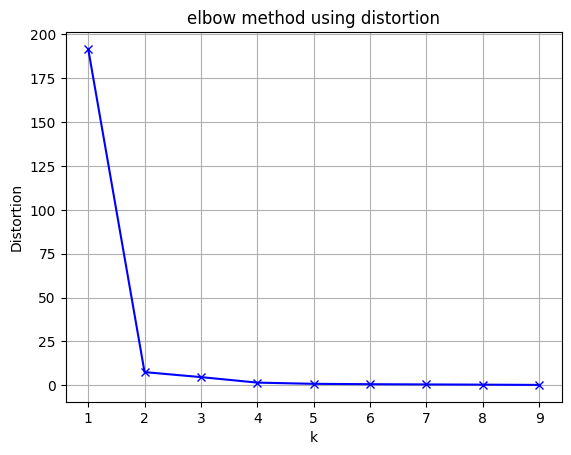

In [135]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('elbow method using distortion')
plt.grid()
plt.show()

In [136]:
# KNN Model
k = 2
knn_mem_usage = NearestNeighbors(n_neighbors=k)
knn_mem_usage.fit(train_data)

NearestNeighbors(n_neighbors=2)

(1000,)


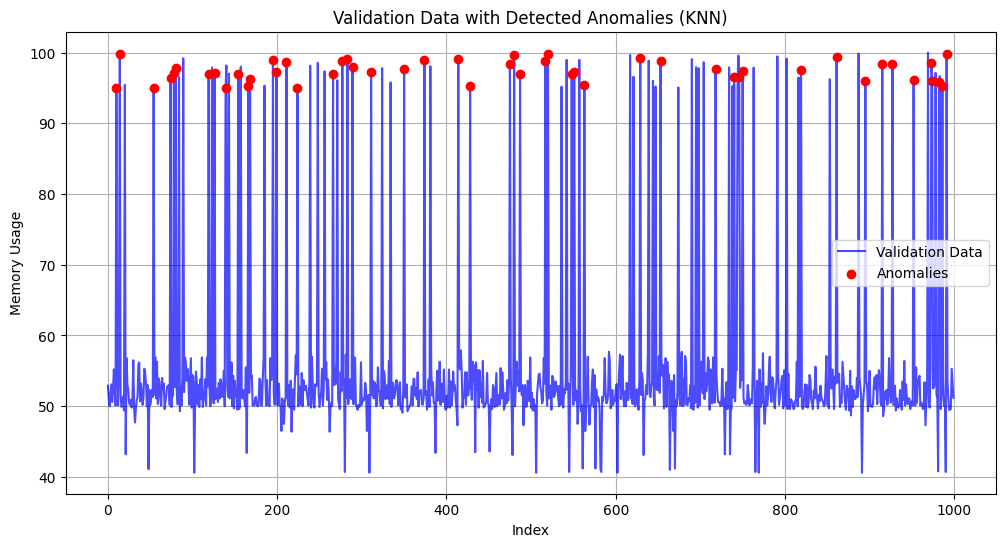

Threshold: 0.0005833134274951127
Number of anomalies detected: 50


In [137]:
# Predict on the validation data
distances, indices = knn_mem_usage.kneighbors(val_data[1000:2000])

# Use the maximum distance to the k-th neighbor as the anomaly score
anomaly_scores = distances[:, -1]

# Set a threshold for anomalies (e.g., 95th percentile)
threshold = np.percentile(anomaly_scores, 95)

# Detect anomalies (points with scores above the threshold)
anomalies = anomaly_scores > threshold
print(anomalies.shape)
val_indices = np.arange(len(val_data[1000:2000]))

# Plot validation data with anomalies highlighted
plt.figure(figsize=(12, 6))

# Plot the full validation data as a line
plt.plot(val_indices, val_data[1000:2000], label='Validation Data', color='blue', alpha=0.7)

# Highlight anomalies as red scatter points
plt.scatter(val_indices[anomalies], val_data[1000:2000][anomalies], color='red', label='Anomalies', zorder=3)

# Add title, labels, and grid
plt.title('Validation Data with Detected Anomalies (KNN)')
plt.xlabel('Index')
plt.ylabel('Memory Usage')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print additional information
print(f"Threshold: {threshold}")
print(f"Number of anomalies detected: {np.sum(anomalies)}")

# KNN for anomaly detection in CPU load

In [138]:
train_data, val_data = train_test_split(df['cpu_load'].values, test_size=0.2, random_state=42)
train_data = train_data.reshape(-1, 1)
val_data = val_data.reshape(-1, 1)

Distortion values:
1 : 0.15169232850405584
2 : 0.04721893061200827
3 : 0.02231492363371546
4 : 0.013752454618843366
5 : 0.009071755417645988
6 : 0.006557575375783668
7 : 0.004973143207813005
8 : 0.0038595481192022192
9 : 0.0030717229257255733


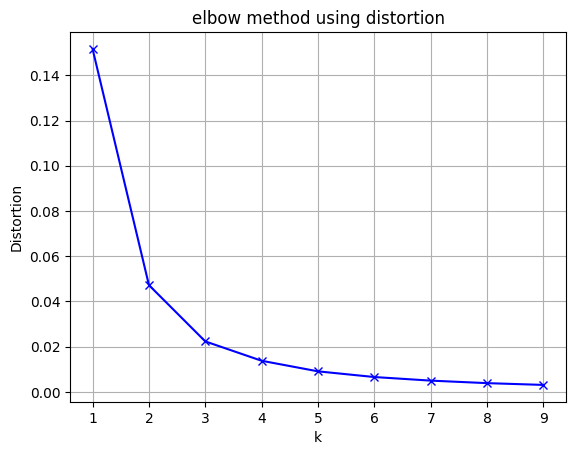

In [139]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(train_data)
    
    # Calculate distortion as the average squared distance from points to their cluster centers
    distortions.append(sum(np.min(cdist(train_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / train_data.shape[0])
    
    # Inertia is calculated directly by KMeans
    inertias.append(kmeanModel.inertia_)
    
    # Store the mappings for easy access
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('elbow method using distortion')
plt.grid()
plt.show()

In [140]:
# KNN Model
k = 2
knn_cpu_load = NearestNeighbors(n_neighbors=k)
knn_cpu_load.fit(train_data)

NearestNeighbors(n_neighbors=2)

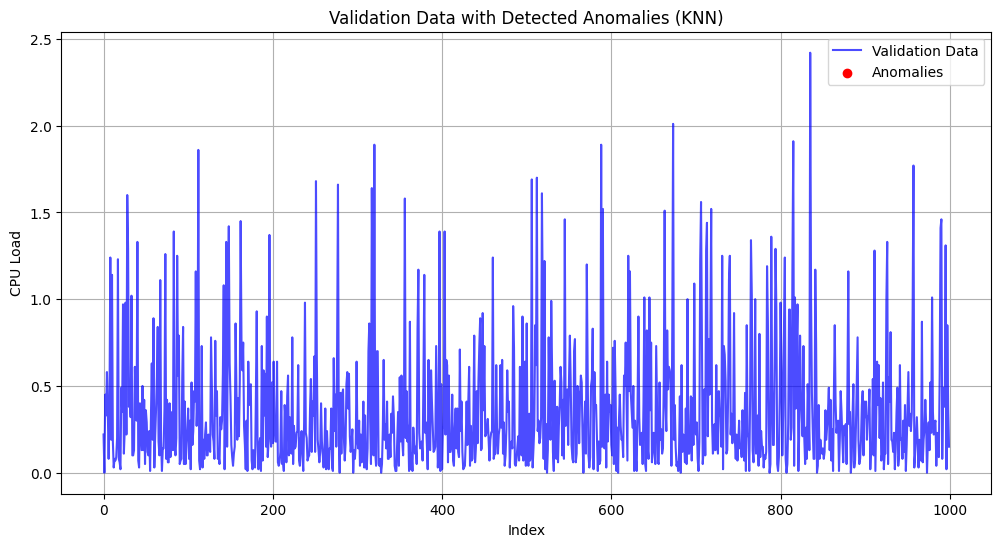

Threshold: 0.0
Number of anomalies detected: 0


In [141]:
# Predict on the validation data
distances, indices = knn_cpu_load.kneighbors(val_data[1000:2000])

# Use the maximum distance to the k-th neighbor as the anomaly score
anomaly_scores = distances[:, -1]

# Set a threshold for anomalies (e.g., 95th percentile)
threshold = np.percentile(anomaly_scores, 95)

# Detect anomalies (points with scores above the threshold)
anomalies = anomaly_scores > threshold
val_indices = np.arange(len(val_data[1000:2000]))

# Plot validation data with anomalies highlighted
plt.figure(figsize=(12, 6))

# Plot the full validation data as a line
plt.plot(val_indices, val_data[1000:2000], label='Validation Data', color='blue', alpha=0.7)

# Highlight anomalies as red scatter points
plt.scatter(val_indices[anomalies], val_data[1000:2000][anomalies], color='red', label='Anomalies', zorder=3)

# Add title, labels, and grid
plt.title('Validation Data with Detected Anomalies (KNN)')
plt.xlabel('Index')
plt.ylabel('CPU Load')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print additional information
print(f"Threshold: {threshold}")
print(f"Number of anomalies detected: {np.sum(anomalies)}")